# <span style="color:cyan">TP5 - DECODAGE ET DECOMPRESSION DU SIGNAL AUDIO </span>

## <span style="color:cyan"><u>EN SÉANCE : 

#### Le signal audio a été compressé et codé au TP4. Nous allons désormais reconstruire le signal sonore pour pouvoir l’écouter et le comparer au signal audio initial.

In [4]:
# NE PAS MODIFIER CETTE CELLULE
%matplotlib ipympl
import numpy as np
from IPython.display import display, Audio
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import sounddevice as sd
import soundfile as sf
from Cod_inv import Fuquant_inv
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from TP4 import *
from FourierCT import ITFCT

##### <u> 1. La fonction Fuquant_inv donnée dans le fichier Cod_inv.py du matériel de TP4&5 permet de décoder les trames  quantifiées et codées par la fonction Fuquant. Tracer la loi caractéristique (sortie = f(entrée)) de la fonction composée Fuquant_inv(Fuquant(x)). Quel est le rôle de cette fonction composée ?

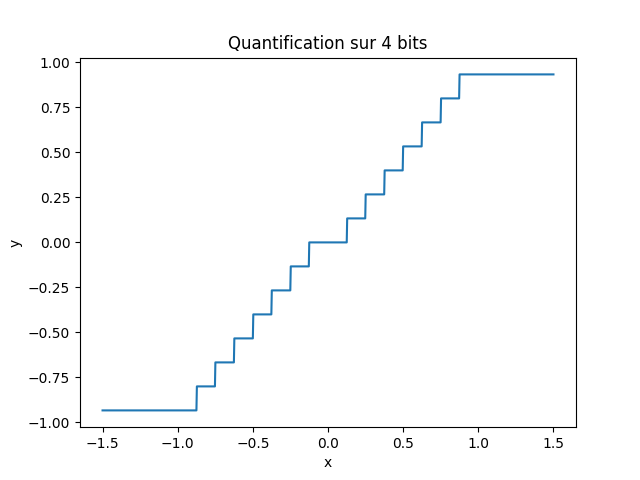

In [6]:
N = 4

x = np.linspace(-1.5, 1.5, 1000)
y = [Fuquant_inv(Fuquant(i, N), N) for i in x]
plt.figure()
plt.plot(x, y, '-')
plt.title(f'Quantification sur {N} bits')
plt.xlabel(f"x")
plt.ylabel("y")
plt.show()

##### <u> 2. A partir de la matrice quantifiée et codée $|X_q^{norm}|$, du nombre de bits alloués donné dans la matrice Q et de la fonction Fuquant_inv, restituer la valeur de chaque point fréquentiel. On pensera également à remettre à l’échelle les spectres d’amplitude des trames avec les facteurs de gains $A_n$ définis au TP4. Stocker le résultat dans une matrice décodée et dénormalisée notée $|X_{uq}|$.

In [7]:
nb_ligne = xq.shape[0]
nb_colonne = xq.shape[1]

x_uq = np.zeros(xq.shape)

for n in range(nb_colonne):
    for k in range(nb_ligne): 
        x_uq[k,n] = Fuquant_inv(xq[k,n], Q[k, n])
    if A[n] != 0:
        x_uq[:, n] /= A[n]

##### <u>3. A partir de la matrice $|X_{uq}|$ reconstruire le signal audio compressé $y$ à partir de sa TFCT en utilisant la fonction ITFCT (disponible dans le fichier FourierCT.py). On pensera pour cela à récupérer l’information de phase du signal initial, avant compression.

In [8]:
w = np.hamming(Nwin)
x_uq = x_uq * np.exp(1j * np.angle(x_mat))
y, t = ITFCT(x_uq,Nwin,Nhop, fs, w)

##### <u> 4. Comparer les signaux audio restitués après compression et décompression avec différents débits. Commenter l’impact du débit sur la compression.

Un haut débit permet d'avoir un bon son. A l'inverse, un faible débit dégrade la qualité sonore.

In [9]:
def compression(D, masq = -96):
    xq, Q, A = TP4(D, masq)

    x_uq = np.zeros(xq.shape)
    nb_ligne = xq.shape[0]
    nb_colonne = xq.shape[1]

    for n in range(nb_colonne):
        for k in range(nb_ligne): 
            x_uq[k,n] = Fuquant_inv(xq[k,n], Q[k, n])
        if A[n] != 0:
            x_uq[:, n] /= A[n]

    x_uq = x_uq * np.exp(1j * np.angle(x_mat))
    y, t = ITFCT(x_uq,Nwin,Nhop, fs, w)
    return y, t

In [10]:
debit = [392e3, 320e3, 240e3, 120e3, 32e3, 8e3]

t_list = []
y_list = []

for i, d in enumerate(debit):
    y, t = compression(int(d)) 
    t_list.append(t)
    y_list.append(y)

In [11]:
sd.play(x_vect, fs)

In [12]:
debit_choisi = 1
sd.play(y_list[debit_choisi], fs)

##### <u>5. A partir de quel débit d’encodage, la compression devient-elle transparente - c’est-à-dire que la différence entre le signal non-compressé et le signal compressé est inaudible ?

La compression devient transparente lorsque le débit depasse les 250kbits/s

##### <u>6. Conclure sur l’intérêt de l’allocation perceptive de bits par rapport à une allocation uniforme. Que faudrait-il faire pour rendre le codage plus efficace ?

L'allocation perspective permet de compresser le signal en utilisant moins de bits tout en maintenant une qualité sonore acceptable. C'est plus efficace qu'une allocation uniforme qui ne prend pas en compte les caractéristiques de l'oreille humaine.

## <span style="color:cyan"><u>BONUS
##### <u>7. Recommencer et comparer avec une allocation uniforme de bits.

In [13]:
# À compléter

##### <u>8. Réaliser une allocation de bits uniforme par bande de fréquences (par exemple par bande de 32 points fréquentiels).

In [ ]:
debit_32 = [250e3, 180e3, 120e3, 32e3, 8e3]

t_list_32 = []
y_list_32 = []

for i, d in enumerate(debit_32):
    y, t = compression(int(d), masq = -96*2) 
    t_list_32.append(t)
    y_list_32.append(y)

In [ ]:
debit_choisi = 0
sd.play(y_list_32[debit_choisi], fs)

##### <u>9. Comparer la compression avec différents enregistrements audio.

In [16]:
# À compléter

##### <u>10. Participer à l’expérience sur la perception de la musique compressée disponible à l’adresse : https://tinyurl.com/qembtrt, et rapporter le score et les impressions.

In [17]:
# À compléter